eliminar outliers
graficar

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [8]:
df_int_accptech = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Acceso por tecnologias.xlsx')

In [10]:
accptech_grouped = df_int_accptech.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
accptech_grouped

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
Año,,,,,
2014,14884750,9975087,604862,305234,286700
2015,15115694,11162971,620877,331431,242846
2016,15073814,12177088,680127,337396,227633
2017,14639302,14148063,766312,432844,344162
2018,13981984,16571272,1079124,870047,465760
2019,12188858,18754974,2450177,1262831,909341
2020,9072828,20539964,4636620,1563813,958018
2021,7802044,22877010,6473506,1927038,1006793
2022,5712223,24122067,10874934,2232136,940575


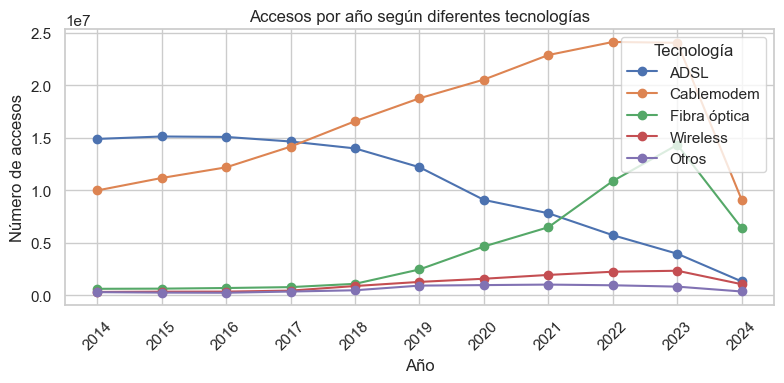

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
for tecnologia in accptech_grouped.columns:
    plt.plot(accptech_grouped.index, accptech_grouped[tecnologia], marker='o', label=tecnologia)
plt.title('Accesos por año según diferentes tecnologías')
plt.xlabel('Año')
plt.ylabel('Número de accesos')
plt.legend(title='Tecnología')
plt.xticks(accptech_grouped.index, rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.tight_layout()
plt.show()

In [16]:
df_int_penpob = pd.read_excel('C:/Python/Data Science/Proyecto_2/Datasets/Internet.xlsx', sheet_name='Penetración-poblacion')

In [29]:
penpob_grouped = df_int_penpob.groupby(['Año', 'Provincia'])['Accesos por cada 100 hab'].mean().reset_index()

In [30]:
df_int_penpob = df_int_penpob[['Año', 'Provincia', 'Accesos por cada 100 hab']]
penpob_grouped.head(10)

,Año,Provincia,Accesos por cada 100 hab
0,2014,Buenos Aires,16.941258
1,2014,Capital Federal,43.110217
2,2014,Catamarca,6.299529
3,2014,Chaco,5.649310
4,2014,Chubut,12.502917
5,2014,Corrientes,5.999478
6,2014,Córdoba,16.426609
7,2014,Entre Ríos,10.456618
8,2014,Formosa,4.492856
9,2014,Jujuy,4.793449


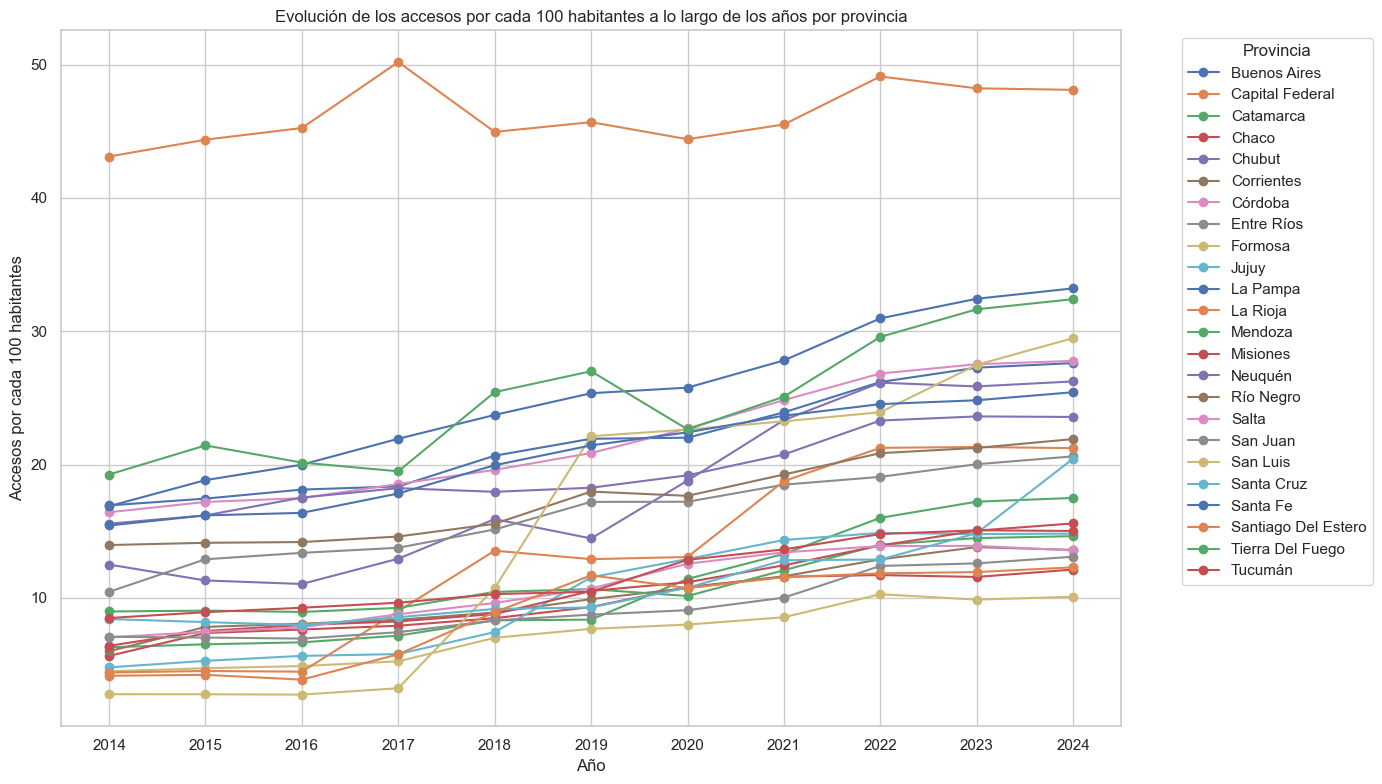

In [31]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
for provincia in penpob_grouped['Provincia'].unique():
    datos_provincia = penpob_grouped[penpob_grouped['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Accesos por cada 100 hab'], marker='o', label=provincia)
plt.title('Evolución de los accesos por cada 100 habitantes a lo largo de los años por provincia')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ubicación de la leyenda fuera del gráfico
plt.xticks(sorted(penpob_grouped['Año'].unique()))  # Asegura que los años en el eje X estén en orden y sin duplicados
plt.tight_layout()  # Ajusta el gráfico para evitar solapamiento

In [42]:
crecimiento = penpob_grouped.groupby('Provincia')['Accesos por cada 100 hab'].agg(lambda x: x.max() - x.min()).reset_index() 
crecimiento.columns = ['Provincia', 'Crecimiento']
crecimiento.sort_values('Crecimiento', ascending=True, inplace=True)

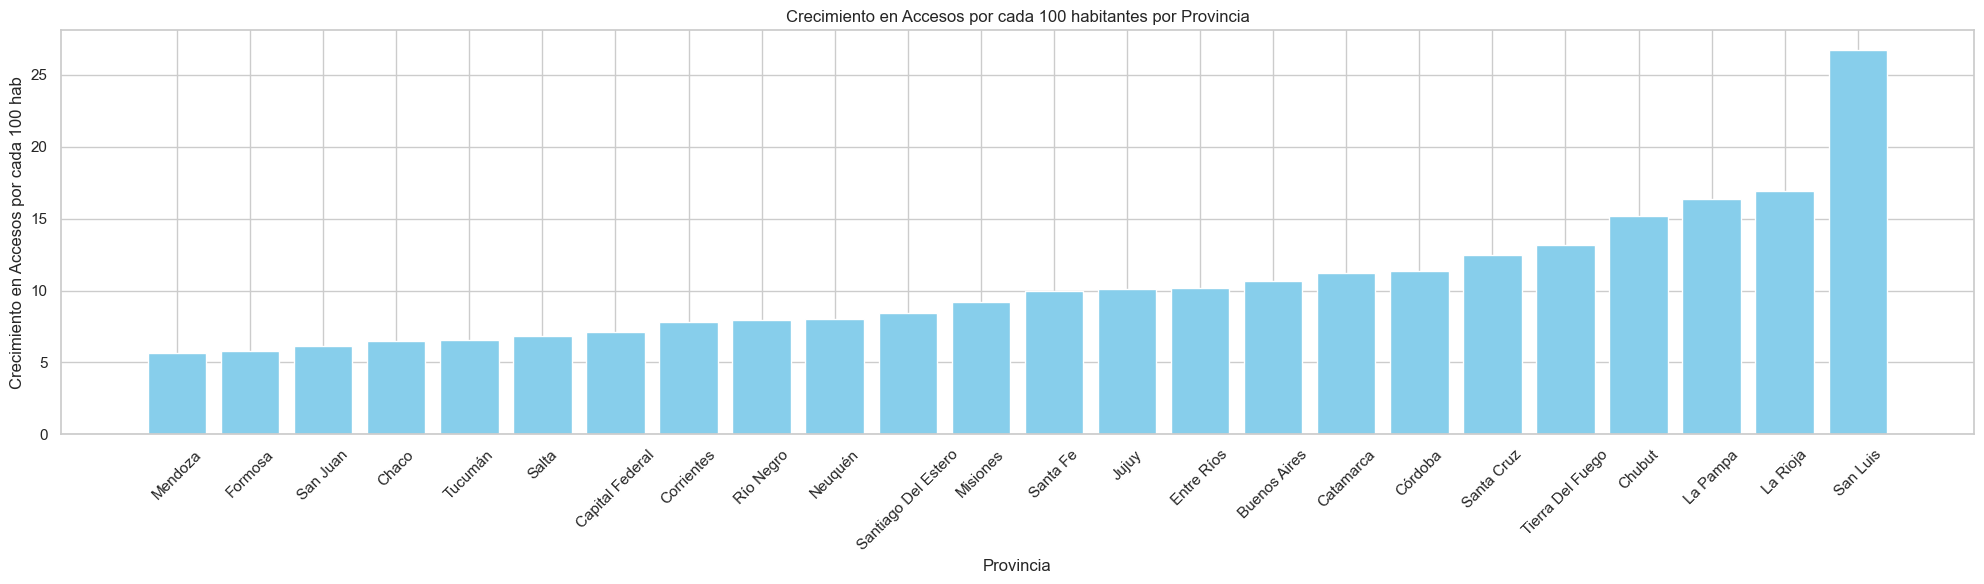

In [43]:
plt.figure(figsize=(20, 6)) 
plt.bar(crecimiento['Provincia'], crecimiento['Crecimiento'], color='skyblue') 
plt.xlabel('Provincia') 
plt.ylabel('Crecimiento en Accesos por cada 100 hab') 
plt.title('Crecimiento en Accesos por cada 100 habitantes por Provincia') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()